### 1. Importación Librerías

In [1]:
#Panda
import pandas as pd
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
#Numpy
import numpy as np
np.random.seed(3301)
#Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
# Seaborn
import seaborn as sea 

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt


### 2. Carga de Datos

In [2]:
# Se cargan los datos. 
datos=pd.read_csv('202210_Laboratorio1_data_Datos_Clasificacion_2022.csv', sep=';', encoding = 'utf-8', index_col=None, low_memory=False)

In [3]:
# Cantidad de datos y número de variables
datos.shape

(100000, 27)

In [4]:
#Visualizacion de los datos
datos.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,1,1,1,40,1,0,0,0,0,1,0,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,25,1,0,0,1,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
2,0,1,1,1,28,0,0,0,0,1,0,0,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
3,0,1,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
4,0,1,1,1,24,0,0,0,1,1,1,0,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


### 3. Limpieza y Preparación de Datos

In [5]:
# Podemos ver los tipos de todas la variables.
datos.dtypes

Diabetes_012             object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                      object
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                 object
PhysHlth                 object
DiffWalk                 object
Sex                      object
Age                      object
Education                object
Income                   object
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
Unnamed: 26             float64
dtype: object

In [6]:
#Creamos variable copia de datos para transformarla
datos_n = datos

In [7]:
# Eliminar las columnas en nulo
datos_n = datos_n.drop(['Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26' ], axis=1)

In [8]:
#Ya que solo hay dos tipo int vamos a transformar los demás
datos_n.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99984,99982,99991,99984,99981,99979,99987,99987,99985,99976,99989,99988,99984,99978,99982,99986,99978,99987,99991,99988,99981,99999
unique,6,5,5,5,95,5,5,5,5,5,5,5,5,5,8,49,54,5,5,16,9,11
top,0,0,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8
freq,84078,56544,56814,96330,9624,55426,95818,90617,76135,63639,81464,94248,95003,91757,35060,68495,62518,83320,56163,13114,43815,36920


In [9]:
#Encontrar valores nulos en las columnas
datos_n.isnull().sum()

Diabetes_012            16
HighBP                  18
HighChol                 9
CholCheck               16
BMI                     19
Smoker                  21
Stroke                  13
HeartDiseaseorAttack    13
PhysActivity            15
Fruits                  24
Veggies                 11
HvyAlcoholConsump       12
AnyHealthcare           16
NoDocbcCost             22
GenHlth                 18
MentHlth                14
PhysHlth                22
DiffWalk                13
Sex                      9
Age                     12
Education               19
Income                   1
dtype: int64

In [10]:
#Visualizacion de copia
datos_n

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,1,1,19,1,0,0,1,0,0,0,1,0,3,0,4,0,0,11,5,5
99996,0,1,1,1,25,1,0,1,1,1,1,0,1,0,2,0,10,1,0,13,4,5
99997,0,0,1,1,29,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,8
99998,0,1,1,1,24,1,0,0,0,0,1,0,1,0,1,0,0,0,0,12,3,3


In [11]:
colNames = datos_n.columns

for i in colNames:
    print (datos_n[i].value_counts())
    print ("_______________________________________")

0     84078
2     13974
1      1892
Xx       17
-        15
?         8
Name: Diabetes_012, dtype: int64
_______________________________________
0     56544
1     43394
-        19
Xx       18
?         7
Name: HighBP, dtype: int64
_______________________________________
0     56814
1     43152
Xx       10
-         8
?         7
Name: HighChol, dtype: int64
_______________________________________
1     96330
0      3624
-        15
Xx       10
?         5
Name: CholCheck, dtype: int64
_______________________________________
27    9624
26    7938
24    7768
25    6712
28    6459
      ... 
88       1
85       1
91       1
86       1
83       1
Name: BMI, Length: 95, dtype: int64
_______________________________________
0     55426
1     44507
Xx       20
-        15
?        11
Name: Smoker, dtype: int64
_______________________________________
0     95818
1      4137
Xx       16
-        13
?         3
Name: Stroke, dtype: int64
_______________________________________
0     90617
1     

In [12]:
#Ahora, viendo que los valores "-", "Xx" y "?" no son valores validos en el CodeBook para las columnas en las que se encuentras, se procede a remplazarlos por el valor de -1 como no valido.
for i in colNames:
    datos_n[i].replace({"-": -1, "Xx": -1, "?": -1}, inplace=True)

In [13]:
# Cantidad de datos de cada clase
for i in colNames:
    print (datos_n[i].value_counts())
    print ("_______________________________________")

0     84078
2     13974
1      1892
-1       40
Name: Diabetes_012, dtype: int64
_______________________________________
0     56544
1     43394
-1       44
Name: HighBP, dtype: int64
_______________________________________
0     56814
1     43152
-1       25
Name: HighChol, dtype: int64
_______________________________________
1     96330
0      3624
-1       30
Name: CholCheck, dtype: int64
_______________________________________
27    9624
26    7938
24    7768
25    6712
28    6459
      ... 
86       1
96       1
88       1
85       1
83       1
Name: BMI, Length: 93, dtype: int64
_______________________________________
0     55426
1     44507
-1       46
Name: Smoker, dtype: int64
_______________________________________
0     95818
1      4137
-1       32
Name: Stroke, dtype: int64
_______________________________________
0     90617
1      9337
-1       33
Name: HeartDiseaseorAttack, dtype: int64
_______________________________________
1     76135
0     23817
-1       33
Name: Phy

In [14]:
#Cambiamos el tipo de datos a numerico para poder evaluar los valores mas adelante
datos_n = datos_n.astype(float)

In [15]:
#Confirmamos que sean numericos y ahora vemos las estadisticas de los datos.
datos_n.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99984.000000,99982.000000,99991.000000,99984.000000,99981.000000,99979.000000,99987.000000,99987.000000,99985.000000,99976.000000,99989.00000,99988.000000,99984.000000,99978.000000,99982.000000,99986.000000,99978.000000,99987.000000,99991.000000,99988.000000,99981.000000,99999.000000
mean,0.298048,0.433578,0.431309,0.963154,28.306628,0.444703,0.041055,0.093052,0.761134,0.636213,0.81433,0.056927,0.949902,0.081588,2.502650,3.147161,4.198214,0.165992,0.437539,8.087621,5.074574,6.103461
std,0.699675,0.496458,0.495766,0.189970,7.703294,0.497860,0.200026,0.291641,0.427166,0.481776,0.38987,0.232738,0.219428,0.274904,1.070946,7.558645,8.932650,0.373015,0.496871,3.048111,0.991986,2.062213
min,-1.000000,-1.000000,-1.000000,-1.000000,-35.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-37.000000,-43.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000,36.000000,42.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [16]:
#Visualizamos los tipos de datos finales
datos_n.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [17]:
#Vemos que hay datos por encima del rango
datos_n.loc[datos_n['MentHlth'] > 30]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
3232,0.0,0.0,0.0,1.0,28.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,36.0,7.0,0.0,0.0,1.0,4.0,6.0
3727,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,36.0,0.0,0.0,0.0,2.0,4.0,1.0
4204,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,32.0,0.0,0.0,1.0,4.0,6.0,5.0
9312,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,32.0,1.0,0.0,1.0,5.0,3.0,8.0
9867,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,36.0,0.0,0.0,0.0,4.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95828,0.0,0.0,1.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,34.0,10.0,0.0,0.0,8.0,6.0,8.0
95985,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,34.0,0.0,0.0,1.0,8.0,6.0,8.0
99189,0.0,0.0,1.0,1.0,34.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,36.0,0.0,0.0,0.0,9.0,6.0,7.0
99207,0.0,1.0,0.0,1.0,46.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,36.0,0.0,0.0,0.0,6.0,5.0,1.0


In [18]:
datos_n.loc[datos_n['MentHlth'] < 0]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
670,2.0,1.0,0.0,1.0,59.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,-25.0,0.0,0.0,0.0,5.0,6.0,1.0
1030,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,-15.0,30.0,1.0,0.0,11.0,3.0,4.0
1308,0.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,-1.0,0.0,0.0,1.0,13.0,5.0,5.0
1412,0.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,-1.0,10.0,1.0,0.0,12.0,3.0,2.0
1740,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,-27.0,7.0,0.0,0.0,10.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98128,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-21.0,5.0,0.0,0.0,13.0,5.0,2.0
98152,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-27.0,0.0,0.0,1.0,4.0,6.0,8.0
99276,2.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,-21.0,1.0,1.0,0.0,10.0,3.0,6.0
99465,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,-33.0,2.0,0.0,1.0,2.0,5.0,3.0


In [19]:
datos_n.loc[datos_n['PhysHlth'] > 30]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
778,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,38.0,0.0,0.0,10.0,4.0,7.0
809,0.0,1.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,38.0,1.0,1.0,13.0,6.0,7.0
1808,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,40.0,0.0,1.0,13.0,6.0,8.0
3139,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,38.0,0.0,0.0,1.0,6.0,2.0
3349,0.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,34.0,0.0,1.0,9.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96004,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,38.0,0.0,0.0,3.0,4.0,6.0
96141,2.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,34.0,0.0,0.0,9.0,6.0,7.0
98481,0.0,1.0,1.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,42.0,0.0,0.0,11.0,4.0,5.0
98852,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,38.0,0.0,0.0,3.0,4.0,5.0


In [20]:
datos_n.loc[datos_n['PhysHlth'] < 0]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
103,2.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,-1.0,0.0,1.0,9.0,6.0,7.0
737,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,-1.0,0.0,0.0,8.0,4.0,3.0
1045,0.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-27.0,0.0,1.0,11.0,6.0,6.0
1062,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-41.0,0.0,1.0,8.0,5.0,8.0
1447,2.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,-27.0,1.0,0.0,13.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96858,0.0,0.0,0.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,-29.0,0.0,1.0,6.0,4.0,6.0
98151,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,-41.0,0.0,0.0,8.0,4.0,5.0
98184,2.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,-35.0,1.0,0.0,10.0,6.0,7.0
98690,2.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,-23.0,1.0,0.0,8.0,4.0,3.0


In [21]:
#Limitamos los rangos
datos_n = datos_n[datos_n.MentHlth <= 30]
datos_n = datos_n[datos_n.MentHlth >= 0]
datos_n = datos_n[datos_n.PhysHlth <= 30]
datos_n = datos_n[datos_n.PhysHlth >= 0]


In [22]:
#Verificamos que los valore extremos se hayan eliminado
datos_n.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99189.000000,99187.000000,99196.000000,99189.000000,99186.000000,99184.000000,99192.000000,99192.000000,99190.000000,99181.00000,99194.000000,99193.00000,99189.000000,99183.000000,99187.000000,99205.000000,99205.000000,99192.000000,99196.000000,99193.000000,99186.000000,99204.000000
mean,0.297916,0.433646,0.431257,0.963222,28.310518,0.444729,0.041042,0.093022,0.761135,0.63618,0.814273,0.05694,0.949994,0.081587,2.502727,3.191875,4.254019,0.166052,0.437709,8.087335,5.074355,6.104008
std,0.699571,0.496454,0.495763,0.189818,7.702129,0.497871,0.199957,0.291607,0.427172,0.48177,0.389924,0.23277,0.219203,0.274875,1.070848,7.375075,8.694724,0.373049,0.496879,3.048500,0.992062,2.061812
min,-1.000000,-1.000000,-1.000000,-1.000000,-35.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.00000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.00000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.00000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [23]:
#Numero de datos y columnas despues de limpieza
datos_n.shape

(99205, 22)

In [24]:
datos_f = datos_n
datos_f = datos_f.reset_index()
datos_f.dtypes

index                     int64
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

### 4. Construcción del modelo con Random Forest

In [25]:
#Se selecciona la variable objetivo 'Diabetes_012'
Y = datos_f['Diabetes_012']
#Del conjunto de datos se elimina la variable 'Outcome'
X = datos_f.drop(['Diabetes_012'],axis=1)

In [26]:
#Se dividen los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
#Graficamos la relación entre Accuracy y n_estimators para conocer que rango buscar en el GridSearchCV
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, Y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [44]:
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

In [45]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [100]:
#De acuerdo al pico de la gráfica buscamos entre ciertos valores de n_estimators
param_grid3 = { 
    'n_estimators': range(90,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
#Usamos GrisSearchCV para buscar los mejores hiperparámetros
mejor3 = GridSearchCV(estimator=rfc, param_grid=param_grid3, cv= particiones)
mejor3.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=199),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(90, 100)})

In [102]:
#Vemos cual fué la mejor combinación de hiperparámetros según la búsqueda
mejor3.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 98}

In [103]:
# Obtener el mejor modelo.
arbol_final3 = mejor3.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train3 = arbol_final3.predict(X_train)
y_pred_test3 = arbol_final3.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % metrics.accuracy_score(Y_train, y_pred_train3))
print('Exactitud sobre test: %.2f' % metrics.accuracy_score(Y_test, y_pred_test3))

Exactitud sobre entrenamiento: 0.91
Exactitud sobre test: 0.78


In [104]:
#Sacamos el reporte de clasificación de train
print(metrics.classification_report(Y_train, y_pred_train3))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       213
         1.0       0.88      0.83      0.85       101

    accuracy                           0.91       314
   macro avg       0.90      0.89      0.89       314
weighted avg       0.91      0.91      0.91       314



In [105]:
#Sacamos el reporte de clasificación de test
print(metrics.classification_report(Y_test, y_pred_test3))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        50
         1.0       0.75      0.62      0.68        29

    accuracy                           0.78        79
   macro avg       0.78      0.75      0.76        79
weighted avg       0.78      0.78      0.78        79



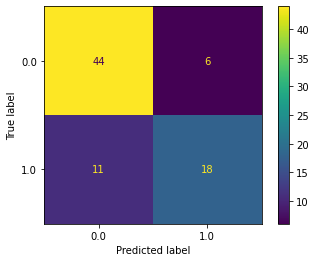

In [106]:
# Se puede visualizar la matriz de confusión donde el modelo tiene una alta probabilidad de predecir 0 en el Outcome.
metrics.plot_confusion_matrix(arbol_final3, X_test, Y_test)  
plt.show()

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
#Se utiliza SMOTE para balancear los datos
sm = SMOTE(random_state = 2)
X_train_bal, Y_train_bal = sm.fit_resample(X_train, Y_train.ravel())

In [109]:
X_train_bal.shape

(426, 9)

In [110]:
X_train.shape

(314, 9)

Text(0, 0.5, 'Testing Accuracy')

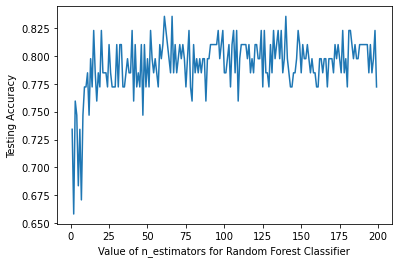

In [111]:
#Graficamos la relación entre Accuracy y n_estimators para conocer que rango buscar en el GridSearchCV
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train_bal, Y_train_bal)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [112]:
#De acuerdo al pico de la gráfica buscamos entre ciertos valores de n_estimators
param_grid_bal = { 
    'n_estimators': range(15,20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [75]:
#Usamos GrisSearchCV para buscar los mejores hiperparámetros
mejor_bal = GridSearchCV(estimator=rfc, param_grid=param_grid_bal, cv= particiones)
mejor_bal.fit(X_train_bal, Y_train_bal)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=199),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(15, 20)})

In [113]:
#Vemos cual fué la mejor combinación de hiperparámetros según la búsqueda
mejor_bal.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 16}

In [114]:
# Obtener el mejor modelo.
arbol_final_bal = mejor_bal.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train_bal = arbol_final_bal.predict(X_train_bal)
y_pred_test_bal = arbol_final_bal.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % metrics.accuracy_score(Y_train_bal, y_pred_train_bal))
print('Exactitud sobre test: %.2f' % metrics.accuracy_score(Y_test, y_pred_test_bal))

Exactitud sobre entrenamiento: 0.99
Exactitud sobre test: 0.77


In [71]:
#Sacamos el reporte de clasificación de test
print(metrics.classification_report(Y_test, y_pred_test_bal))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        50
         1.0       0.71      0.76      0.73        29

    accuracy                           0.80        79
   macro avg       0.78      0.79      0.79        79
weighted avg       0.80      0.80      0.80        79



In [72]:
#Sacamos el reporte de clasificación de train
print(metrics.classification_report(Y_train_bal, y_pred_train_bal))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       213
         1.0       0.96      1.00      0.98       213

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



### 5. Predicciones y Probabilidad

In [ ]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
predic = arbol_final3.predict_proba(X_test.iloc[[30]])

In [ ]:
print(predic)

[[1. 0.]]


In [ ]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
arbol_final3.classes_

array([0., 1.])

### 6. Interpretación del Modelo

In [ ]:
importancia = arbol_final3.feature_importances_
importancia

array([0.07929099, 0.21802719, 0.07310091, 0.07282105, 0.20722383,
       0.08011417, 0.09734276, 0.16905816, 0.00302093])

In [ ]:
#Encontramos los valores de importancia que se le dieron a las variables del modelo
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Glucose,0.218027
1,Insulin,0.207224
2,Age,0.169058
3,DiabetesPedigreeFunction,0.097343
4,BMI,0.080114
5,Pregnancies,0.079291
6,BloodPressure,0.073101
7,SkinThickness,0.072821
8,HairColor,0.003021


Gracias a los resultados de la importancia de cada variable frente al modelo, podemos decir que la menos relevante es el color de pelo, y que las trés mas relevantes son Glucosa, Insulina y Edad (en ese orden). Viendo que la insulina es una de las mas importantes, buscamos otra manera de reemplazar los valores faltantes (en ceros) que son bastantes. Implementamos el modelo con KNNImputer, pero esto, aunque si ayuda en mantener una cantidad de muestras mas importante, no mejora la capacidad de clasificación del modelo.